In [1]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Arial"

In [2]:
def get_fp_mat(smiles_list, fpsize = 1024, check_smiles = True):

    # initialize the feature matrix
    fp_mat = np.zeros((len(smiles_list), fpsize))
    
    # loop through the SMILES
    if check_smiles:
        for idx, smiles in enumerate(smiles_list):
            m = Chem.MolFromSmiles(smiles)

            # check if the input SMILES is valid
            if m is None:
                print('Invalid SMILES: Index {} {}'.format(idx, smiles))
                        
            else:
                # get the fingerprints
                fp_mat[idx, :] = np.array(AllChem.GetMorganFingerprintAsBitVect(m, 3, nBits=1024))
                
    # use when the smiles validity is already checked    
    else:
        for idx, smiles in enumerate(smiles_list):
            m = Chem.MolFromSmiles(smiles)
            # get the fingerprints
            fp_mat[idx, :] = np.array(AllChem.GetMorganFingerprintAsBitVect(m, 3, nBits=1024))
            
    return fp_mat            

In [3]:
dataset = pd.read_csv('dataset_202_with_design.csv',names=['smiles','logCMC'])
all_ind = np.arange(202)
test_ind = np.array([8,14,26,31,43,54,57,68,72,80,99,110,125,132,140,150,164,171,178,185,192,197])
train_ind = np.asarray([x for x in all_ind if x not in test_ind])
design_ind = np.arange(202,206,1)

In [4]:
train_test_label = []
for i in range(len(dataset)):
    if i in test_ind:
        train_test_label.append('test')
    elif i in train_ind:
        train_test_label.append('train')
    else:
        train_test_label.append('design')

In [5]:
X = get_fp_mat(dataset['smiles'].to_list())
seed = 2021
tsne = TSNE(n_components=2,random_state=seed)
tsne_components = tsne.fit_transform(X)
dataset['tsne_para1'] = tsne_components[:,0]
dataset['tsne_para2'] = tsne_components[:,1]

In [6]:
X.shape

(206, 1024)

In [6]:
pca = PCA(n_components=2)
pca.fit(X[train_ind])
pca_components = pca.transform(X)

In [7]:
dataset['pca_para1'] = pca_components[:,0]
dataset['pca_para2'] = pca_components[:,1]

In [8]:
dataset_train = dataset.loc[train_ind]
dataset_test = dataset.loc[test_ind]
dataset_design = dataset.loc[design_ind]

In [9]:
# fig,ax = plt.subplots(figsize=(3.3,3.6))
# im = ax.scatter(dataset_train['tsne_para1'], dataset_train['tsne_para2'], 
#                 c=dataset_train['logCMC'], alpha=0.7, edgecolors='none',cmap=plt.cm.get_cmap('Spectral'),
#                 vmin=-1,vmax=5,s=50,label='train')
# ax.scatter(dataset_test['tsne_para1'], dataset_test['tsne_para2'], 
#            marker='x',c=dataset_test['logCMC'], alpha=0.7, edgecolors='none',cmap=plt.cm.get_cmap('Spectral'),
#            vmin=-1,vmax=5,s=50,label='test')
# ax.set_xticks(np.arange(-15,16,5))
# ax.set_yticks(np.arange(-15,16,5))
# ax.set_xlabel(r'$dimension_1$',size=11)
# ax.set_ylabel(r'$dimension_2$',size=11)
# cbar = fig.colorbar(im, ax=ax)
# cbar.set_label('log CMC', rotation=270)
# plt.legend(loc='center',bbox_to_anchor=(0.5, -0.4))
# plt.tight_layout()
# plt.show()

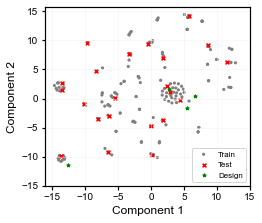

In [49]:
fig,ax = plt.subplots(figsize=(3.75,3.2))
ax.grid(color='0.95',alpha=0.6)
im = ax.scatter(dataset_train['tsne_para1'], dataset_train['tsne_para2'], 
                c='0.5', alpha=1, edgecolors='none',
                vmin=-1,vmax=5,s=10,label='Train')
ax.scatter(dataset_test['tsne_para1'], dataset_test['tsne_para2'], 
           marker='x', c='r', alpha=1, edgecolors='none',
           vmin=-1,vmax=5,s=15,label='Test')
ax.scatter(dataset_design['tsne_para1'], dataset_design['tsne_para2'], 
           marker='*', c='g', alpha=1, 
           vmin=-1,vmax=5,s=12,label='Design')
ax.set_xticks(np.arange(-15,16,5))
ax.set_yticks(np.arange(-15,16,5))
ax.set_xlabel('Component 1',size=12)
ax.set_ylabel('Component 2',size=12)
plt.legend(loc='best',prop={'size': 8})
plt.gca().spines['left'].set_linewidth(1.2)
plt.gca().spines['bottom'].set_linewidth(1.2)
plt.gca().spines['right'].set_linewidth(1.2)
plt.gca().spines['top'].set_linewidth(1.2)
plt.gca().tick_params(width=1.2)  
# plt.legend(loc='center',bbox_to_anchor=(0.5, -0.4))
plt.tight_layout()
plt.show()
fig.savefig("tsne_{}.pdf".format(seed),transparent=True)

In [53]:
dataset.loc[174]
dataset.loc[122]
dataset.loc[192]
dataset.loc[48]


smiles        CCCCCCCCCCCCCCCC(=O)NC1CCOC1=O
logCMC                              -0.79588
tsne_para1                          7.251263
tsne_para2                         -4.996642
pca_para1                           0.343548
pca_para2                          -1.147743
Name: 48, dtype: object

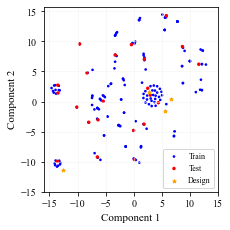

In [31]:
fig,ax = plt.subplots(figsize=(3.3,3.3))
ax.grid(color='0.95',alpha=0.6)
im = ax.scatter(dataset_train['tsne_para1'], dataset_train['tsne_para2'], 
                c='b', alpha=0.5, edgecolors='none',
                vmin=-1,vmax=5,s=8,label='Train')
ax.scatter(dataset_test['tsne_para1'], dataset_test['tsne_para2'], 
           marker='^', c='g', alpha=1, edgecolors='none',
           vmin=-1,vmax=5,s=12,label='Test')
ax.scatter(dataset_design['tsne_para1'], dataset_design['tsne_para2'], 
           marker='*', c='orange', alpha=1, 
           vmin=-1,vmax=5,s=12,label='Design')
ax.set_xticks(np.arange(-15,16,5))
ax.set_yticks(np.arange(-15,16,5))
ax.set_xlabel('Component 1',size=11)
ax.set_ylabel('Component 2',size=11)
plt.legend(loc='best',prop={'size': 8})
# plt.legend(loc='center',bbox_to_anchor=(0.5, -0.4))
plt.tight_layout()
plt.show()
fig.savefig('tsne_v2_{}.png'.format(seed),dpi=300)

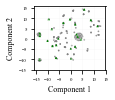

In [23]:
fig,ax = plt.subplots(figsize=(1.7,1.5))
ax.grid(color='0.95',alpha=0.6,linewidth=0.5)
im = ax.scatter(dataset_train['tsne_para1'], dataset_train['tsne_para2'], 
                c='0.5', alpha=0.8, edgecolors='none',
                vmin=-1,vmax=5,s=3,label='Train')
ax.scatter(dataset_test['tsne_para1'], dataset_test['tsne_para2'], 
           marker='^', c='g', alpha=1, edgecolors='none',
           vmin=-1,vmax=5,s=6,label='Test')
ax.set_xticks(np.arange(-15,16,5))
ax.set_yticks(np.arange(-15,16,5))
ax.set_xlabel('Component 1',size=8)
ax.set_ylabel('Component 2',size=8)
# plt.legend(loc='best',prop={'size': 8})
# plt.legend(loc='center',bbox_to_anchor=(0.5, -0.4))
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.tight_layout()
plt.show()
fig.savefig('tsne_{}_small.png'.format(seed),dpi=300)

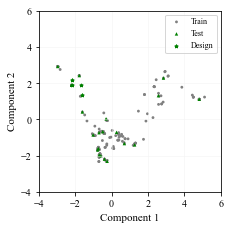

In [24]:
fig,ax = plt.subplots(figsize=(3.3,3.3))
ax.grid(color='0.95',alpha=0.6)
im = ax.scatter(dataset_train['pca_para1'], dataset_train['pca_para2'], 
                c='0.5', alpha=1, edgecolors='none',
                vmin=-1,vmax=5,s=8,label='Train')
ax.scatter(dataset_test['pca_para1'], dataset_test['pca_para2'], 
           marker='x', c='r', alpha=1, edgecolors='none',
           vmin=-1,vmax=5,s=12,label='Test')
ax.scatter(dataset_design['pca_para1'], dataset_design['pca_para2'], 
           marker='*', c='g', alpha=1, 
           vmin=-1,vmax=5,s=12,label='Design')
ax.set_xticks(np.arange(-4,7,2))
ax.set_yticks(np.arange(-4,7,2))
ax.set_xlabel('Component 1',size=11)
ax.set_ylabel('Component 2',size=11)
plt.legend(loc='best',prop={'size': 8})
# plt.legend(loc='center',bbox_to_anchor=(0.5, -0.4))
plt.tight_layout()
plt.show()
fig.savefig('pca.png',dpi=300)